In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# run plots in the notebook
%matplotlib inline

In [5]:
url = "http://pbpython.com/extras/sample-salesv2.csv" 
sales = pd.read_csv(url)
sales.columns

Index([u'account number', u'name', u'sku', u'category', u'quantity',
       u'unit price', u'ext price', u'date'],
      dtype='object')

In [6]:
# Rename the columns to use underscores instead of spaces
sales.columns = ['acct_num', 'name', 'sku', 'category', 'quantity', 'unit_price', 'ext_price', 'date']

In [8]:
sales.head()

,acct_num,name,sku,category,quantity,unit_price,ext_price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [9]:
#Subset the dataframe to contain only the name, category, quantity and unit price columns
shirt_df = sales[['name', 'category', 'quantity', 'unit_price']]
shirt_df = shirt_df[shirt_df['category']== 'Shirt']

In [10]:
shirt_df.head()

,name,category,quantity,unit_price
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98


In [11]:
#Calculate the total cost per shirt sale
shirt_df['shirt_sales'] = shirt_df.quantity * shirt_df.unit_price
shirt_df.head()

,name,category,quantity,unit_price,shirt_sales
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16,289.92
3,Waters-Walker,Shirt,5,82.68,413.40
4,Waelchi-Fahey,Shirt,18,99.64,1793.52
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82,897.94
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98,323.76


In [13]:
#Group the shirt sales by company name
shirt_by_company = shirt_df.groupby('name', as_index=False).sum()
shirt_by_company.head()

,name,quantity,unit_price,shirt_sales
0,Berge LLC,166,1226.54,9670.24
1,Carroll PLC,257,1098.93,13717.61
2,Cole-Eichmann,236,1226.75,14528.01
3,"Davis, Kshlerin and Reilly",161,828.51,7533.03
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19


In [14]:
#Pull out top 10 shirt sales
top_sellers = shirt_by_company.sort_values(by='shirt_sales', ascending=False).head(10)
top_sellers

,name,quantity,unit_price,shirt_sales
11,"Kihn, McClure and Denesik",288,1653.58,18956.35
19,Waters-Walker,288,1603.36,18633.71
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19
7,Hegmann and Sons,278,1528.84,16774.47
14,Kunze Inc,260,1439.92,15638.87
2,Cole-Eichmann,236,1226.75,14528.01
1,Carroll PLC,257,1098.93,13717.61
10,"Kerluke, Reilly and Bechtelar",269,1038.53,12958.23
17,"Volkman, Goyette and Lemke",220,1136.25,12791.27
5,Gorczany-Hahn,237,1132.22,12576.83


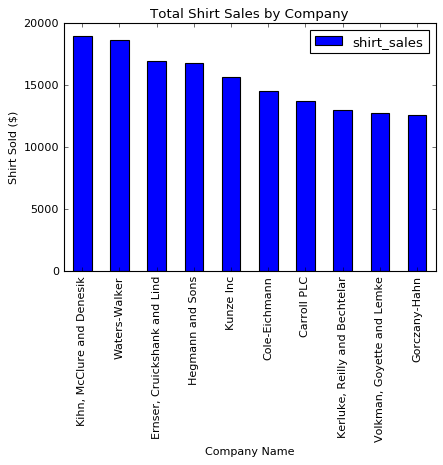

In [16]:
#Graph the top 10 shirt sales
shirt_plot = top_sellers.plot(kind="bar", 
                             title="Total Shirt Sales by Company",
                             x="name",
                             y="shirt_sales")
shirt_plot.set_xlabel("Company Name")
shirt_plot.set_ylabel("Shirt Sold ($)")
